In [15]:
# Multi Agent with supervisor
from langchain_openai.chat_models.azure import AzureChatOpenAI
import os

llm = AzureChatOpenAI(
    openai_api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    azure_deployment=os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT_NAME"],
)

In [33]:
# create wikipedia agent
import wikipedia

search = wikipedia.summary("fender jazz bass", sentences = 5)

print(search)


The Fender Jazz Bass (often shortened to "J-Bass") is the second model of electric bass created by Leo Fender. It is distinct from the Precision Bass in that its tone is brighter and richer in the midrange and treble with less emphasis on the fundamental frequency.  The body shape is also different from the Precision Bass, in that the Precision Bass has a symmetrical lower bout on the body, designed after the Telecaster and Stratocaster lines of guitars, while the Jazz Bass has an offset lower bout, mimicking the design aesthetic of the Jaguar and Jazzmaster guitars.


== History ==
First introduced in 1960 as the Deluxe Model, it borrowed design elements from the Jazzmaster guitar. It was renamed the Jazz Bass as Fender felt that its redesigned neck—narrower and more rounded than that of the Precision Bass—would appeal more to jazz musicians.


In [16]:
from langgraph.prebuilt import create_react_agent

from langchain_experimental.tools import PythonREPLTool

python_repl_tool = PythonREPLTool()

code_agent = create_react_agent(model = llm, 
                                tools=[python_repl_tool], 
                                prompt="You may generate safe python code to analyze data and generate charts using matplotlib.")

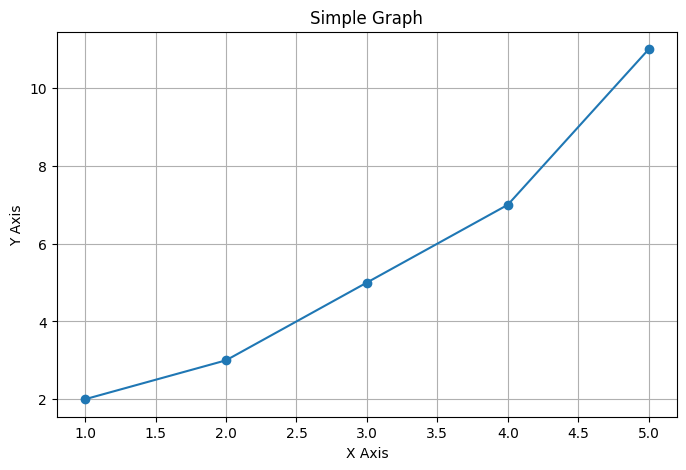

In [23]:
code_results = code_agent.invoke({"messages": ["I need a simple graph with the x and y axis"]})

In [32]:
code_results['messages'][0]

HumanMessage(content='I need a simple graph with the x and y axis', additional_kwargs={}, response_metadata={}, id='7037f5f4-7a05-4432-8e24-b9684a1328f1')

In [12]:
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts import MessagesPlaceholder

from typing import Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

    next: str


def agent_node(state, agent, name):
    result = agent.invoke(state)
    return {"messages": [HumanMessage(content=result["messages"], name = name)]}

In [17]:
import functools

code_node = functools.partial(agent_node, agent = code_agent , name="Coder")

In [18]:
from langgraph.graph import StateGraph, END

workflow = StateGraph(AgentState)

workflow.add_node("code", code_node)

workflow.add_edge("code", END)

workflow.set_entry_point("code")

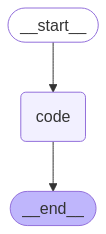

In [19]:
app = workflow.compile()

from IPython.display import Image, display
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

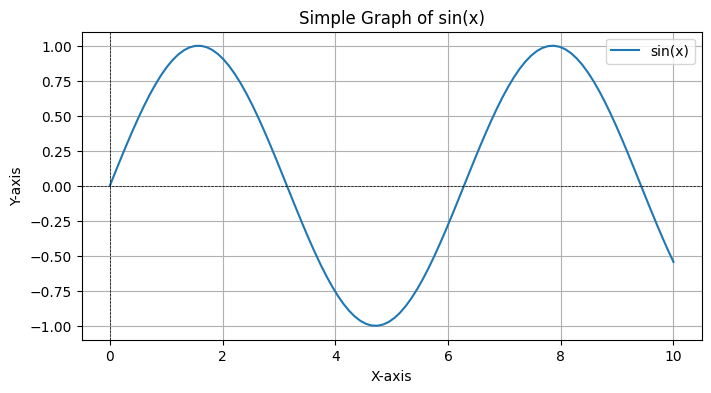

ValidationError: 9 validation errors for HumanMessage
content.str
  Input should be a valid string [type=string_type, input_value=[HumanMessage(content='Si...': 0, 'reasoning': 0}})], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].0.str
  Input should be a valid string [type=string_type, input_value=HumanMessage(content='Sim...4fca-b04c-a2181d59f86b'), input_type=HumanMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].0.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=HumanMessage(content='Sim...4fca-b04c-a2181d59f86b'), input_type=HumanMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type
content.list[union[str,dict[any,any]]].1.str
  Input should be a valid string [type=string_type, input_value=AIMessage(content='', add...o': 0, 'reasoning': 0}}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].1.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=AIMessage(content='', add...o': 0, 'reasoning': 0}}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type
content.list[union[str,dict[any,any]]].2.str
  Input should be a valid string [type=string_type, input_value=ToolMessage(content='', n...wfisQJRBMr07qP8jvowZL5'), input_type=ToolMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].2.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=ToolMessage(content='', n...wfisQJRBMr07qP8jvowZL5'), input_type=ToolMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type
content.list[union[str,dict[any,any]]].3.str
  Input should be a valid string [type=string_type, input_value=AIMessage(content='The gr...o': 0, 'reasoning': 0}}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].3.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=AIMessage(content='The gr...o': 0, 'reasoning': 0}}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type

In [23]:
app.invoke({"messages": ["Simple graph with x and y axis"]})

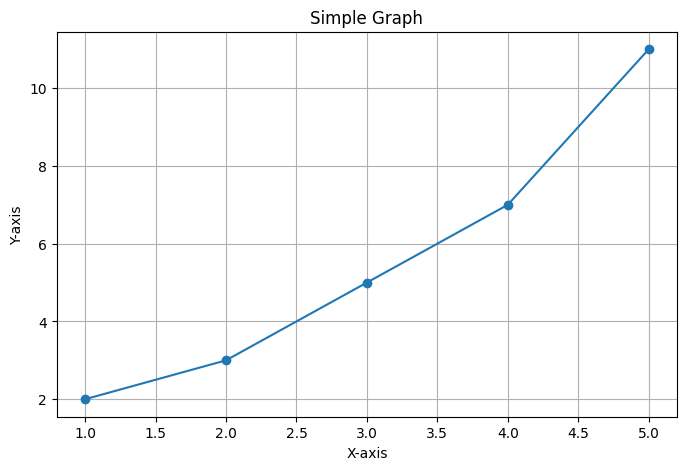

ValidationError: 9 validation errors for HumanMessage
content.str
  Input should be a valid string [type=string_type, input_value=[HumanMessage(content='Si...': 0, 'reasoning': 0}})], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].0.str
  Input should be a valid string [type=string_type, input_value=HumanMessage(content='Sim...42f9-8f94-b3a57bdff7ca'), input_type=HumanMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].0.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=HumanMessage(content='Sim...42f9-8f94-b3a57bdff7ca'), input_type=HumanMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type
content.list[union[str,dict[any,any]]].1.str
  Input should be a valid string [type=string_type, input_value=AIMessage(content='', add...o': 0, 'reasoning': 0}}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].1.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=AIMessage(content='', add...o': 0, 'reasoning': 0}}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type
content.list[union[str,dict[any,any]]].2.str
  Input should be a valid string [type=string_type, input_value=ToolMessage(content='', n...eOsJjckj28eTrPJVAoUqOM'), input_type=ToolMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].2.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=ToolMessage(content='', n...eOsJjckj28eTrPJVAoUqOM'), input_type=ToolMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type
content.list[union[str,dict[any,any]]].3.str
  Input should be a valid string [type=string_type, input_value=AIMessage(content='The gr...o': 0, 'reasoning': 0}}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].3.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=AIMessage(content='The gr...o': 0, 'reasoning': 0}}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type

In [22]:
for s in app.stream(
    {
        "messages":[HumanMessage(content="Simple graph with x and y axis")]
    }
):
    if "end" not in s:
        print(s)
        print("----")
